In [1]:
import seaborn as sns

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


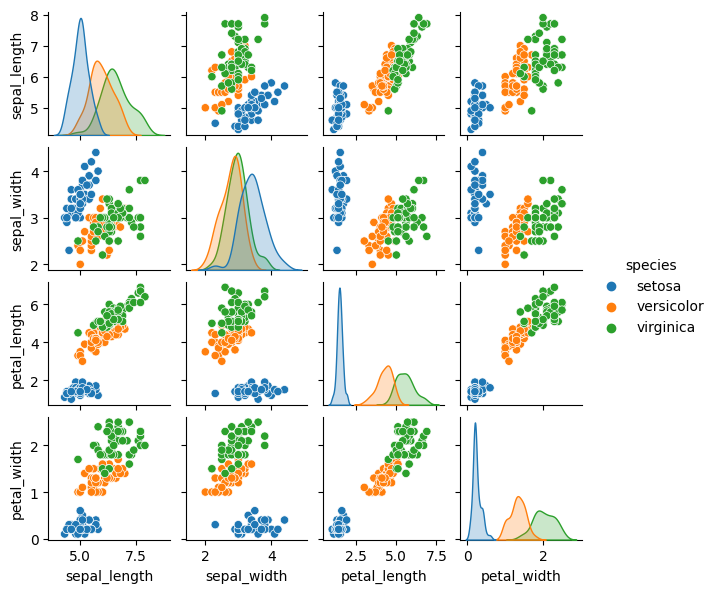

In [3]:
sns.pairplot(iris, hue='species', height=1.5)

In [4]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

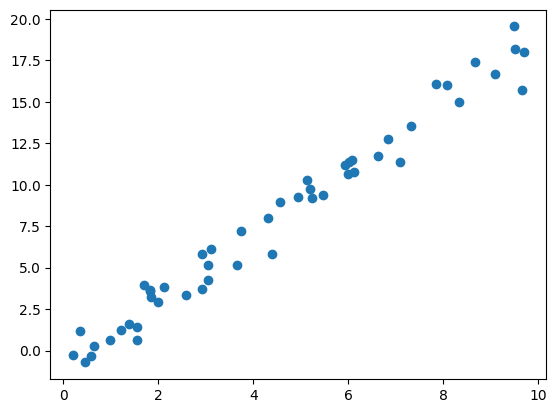

In [8]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression(fit_intercept=True)

In [11]:
X.shape

NameError: name 'X' is not defined

In [13]:
X_iris.shape

(150, 4)

In [15]:
model.fit(x[:, np.newaxis], y)

LinearRegression()

In [16]:
model.coef_

array([1.9776566])

In [17]:
xfit = np.linspace(-1, 11)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state=1)

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [22]:
y_model = model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test, y_model)

0.9736842105263158

In [25]:
from sklearn.decomposition import PCA

In [26]:
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

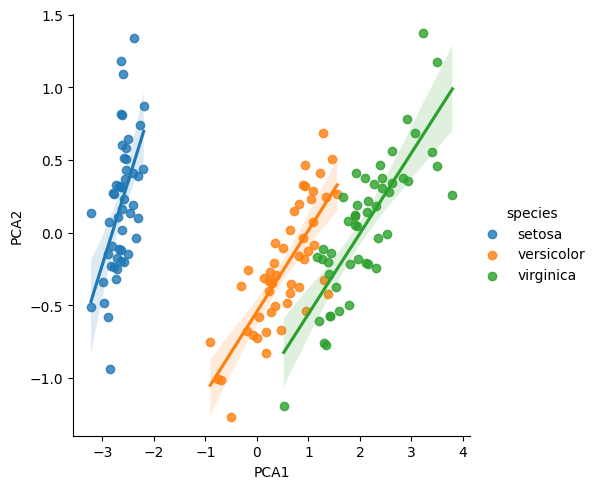

In [27]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x='PCA1', y='PCA2', hue='species', data=iris)

In [28]:
from sklearn.mixture import GaussianMixture

In [29]:
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

In [30]:
iris['cluster'] = y_gmm

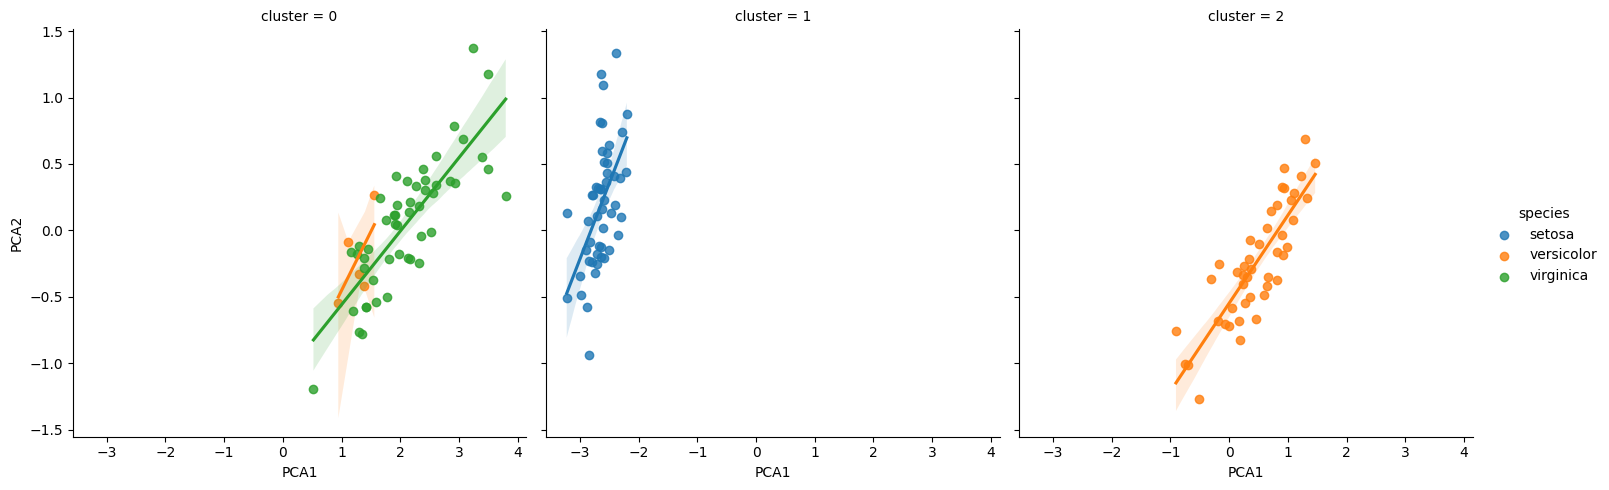

In [32]:
sns.lmplot(x='PCA1', y='PCA2', data=iris, hue='species', col='cluster')

In [33]:
from sklearn.datasets import load_digits

In [34]:
digits = load_digits()

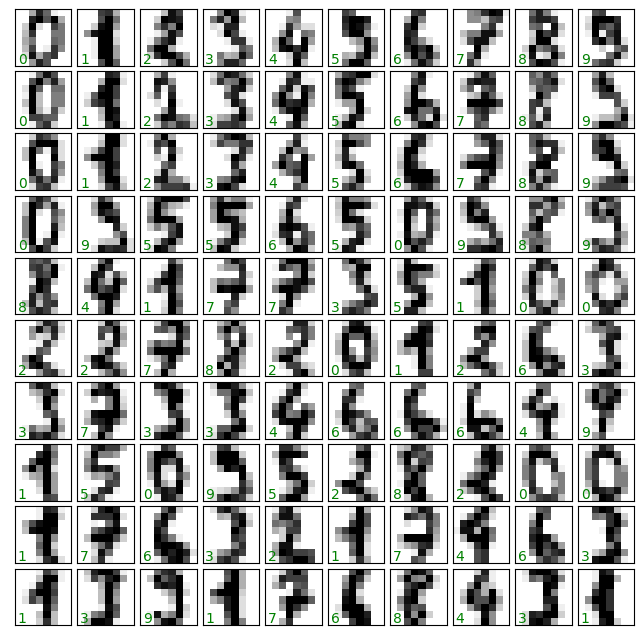

In [42]:
fig, ax = plt.subplots(10, 10, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]},
  gridspec_kw=dict(hspace=.1, wspace=.1))

for i, a in enumerate(ax.flat):
  a.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  a.text(.05, .05, str(digits.target[i]), transform=a.transAxes, color='green')

In [43]:
from sklearn.manifold import Isomap

In [44]:
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)

/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:352: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/homebrew/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


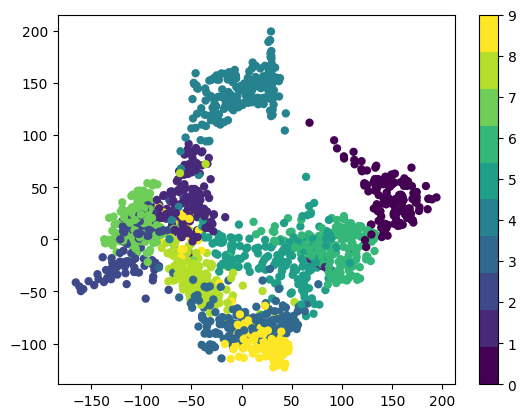

In [49]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none',
  cmap=plt.cm.get_cmap('viridis', 10))
plt.colorbar(ticks=range(10))

In [51]:
X = digits.data
y = digits.target

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [53]:
model = GaussianNB()
model.fit(X_train, y_train)
y_model = model.predict(X_test)

In [54]:
accuracy_score(y_test, y_model)

0.8333333333333334

In [55]:
from sklearn.metrics import confusion_matrix

<AxesSubplot: >

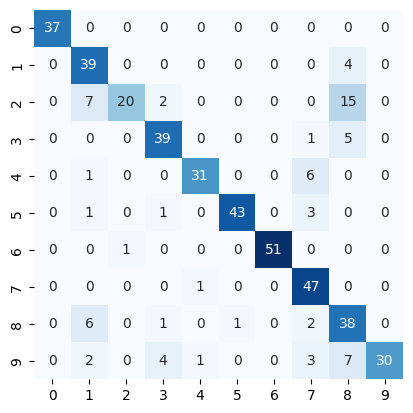

In [59]:
mat = confusion_matrix(y_test, y_model)
sns.heatmap(mat, square=True, annot=True, cmap='Blues', cbar=False)

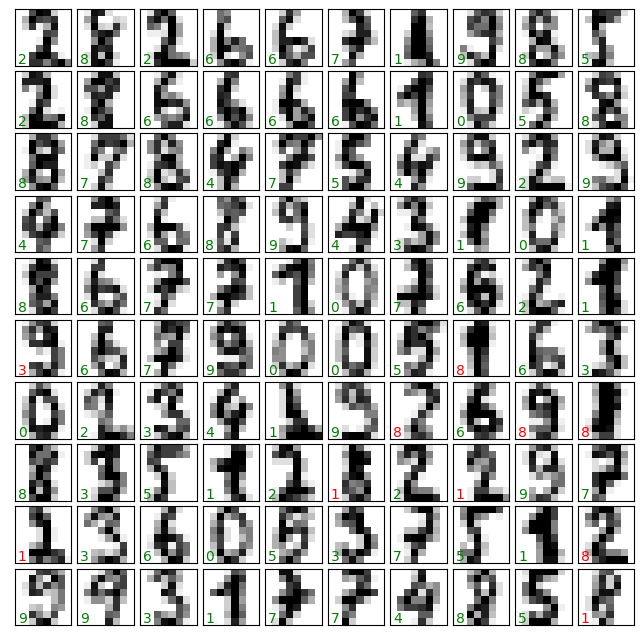

In [63]:
fig, ax = plt.subplots(10, 10, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]},
  gridspec_kw=dict(hspace=.1, wspace=.1))

test = X_test.reshape(-1, 8, 8)

for i, a in enumerate(ax.flat):
  a.imshow(test[i], cmap='binary', interpolation='nearest')
  a.text(.05, .05, str(y_model[i]),transform=a.transAxes,
    color='green' if (y_test[i] == y_model[i]) else 'red')

In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [65]:
def PolyRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [66]:
def make_data(N, err = 1, rseed=1):
  rng = np.random.RandomState(rseed)
  X = rng.rand(N, 1) ** 2
  y = 10 - 1. / (X.ravel() + .1)
  if err > 0:
    y += err * rng.randn(N)
  return X, y

In [67]:
X, y = make_data(40)

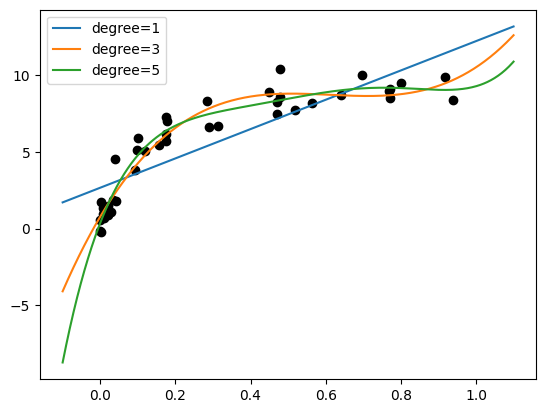

In [71]:
X_test = np.linspace(-.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()

for degree in [1, 3, 5]:
  y_test = PolyRegression(degree).fit(X, y).predict(X_test)
  plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
  
plt.legend()

In [72]:
from sklearn.model_selection import validation_curve

In [74]:
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolyRegression(), X, y, param_name='polynomialfeatures__degree', param_range=degree, cv=7)

(0.0, 1.0)

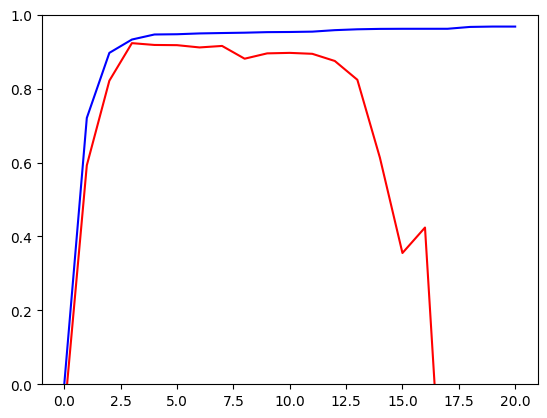

In [77]:
plt.plot(degree, np.median(train_score, 1), color='blue', label='training_score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.ylim(0,1)

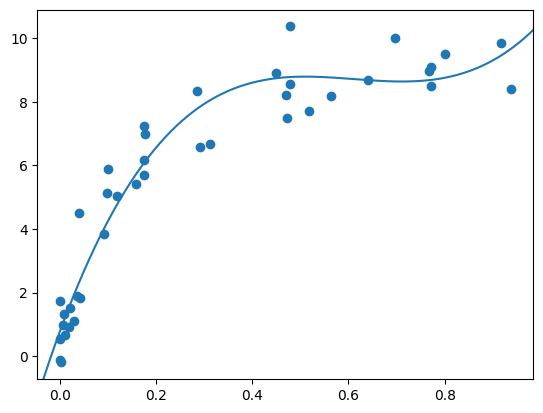

In [79]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolyRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim);

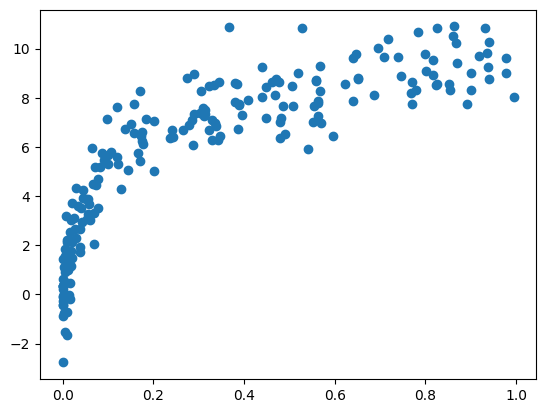

In [80]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

In [84]:
degree = np.arange(21)
train_2, val_2 = validation_curve(
  PolyRegression(), X2, y2, param_name="polynomialfeatures__degree",
  param_range=degree, cv=7
)

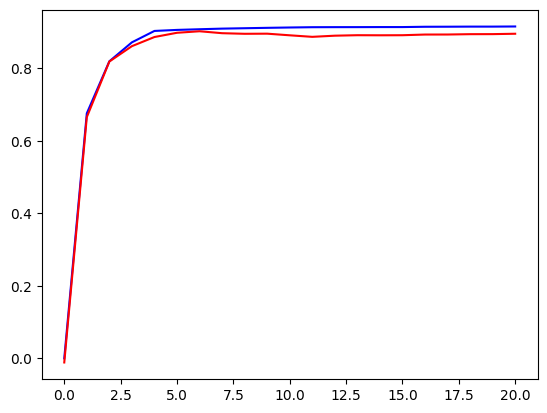

In [86]:
plt.plot(degree, np.median(train_2, 1), color='blue')
plt.plot(degree, np.median(val_2, 1), color='red')

In [87]:
from sklearn.model_selection import learning_curve


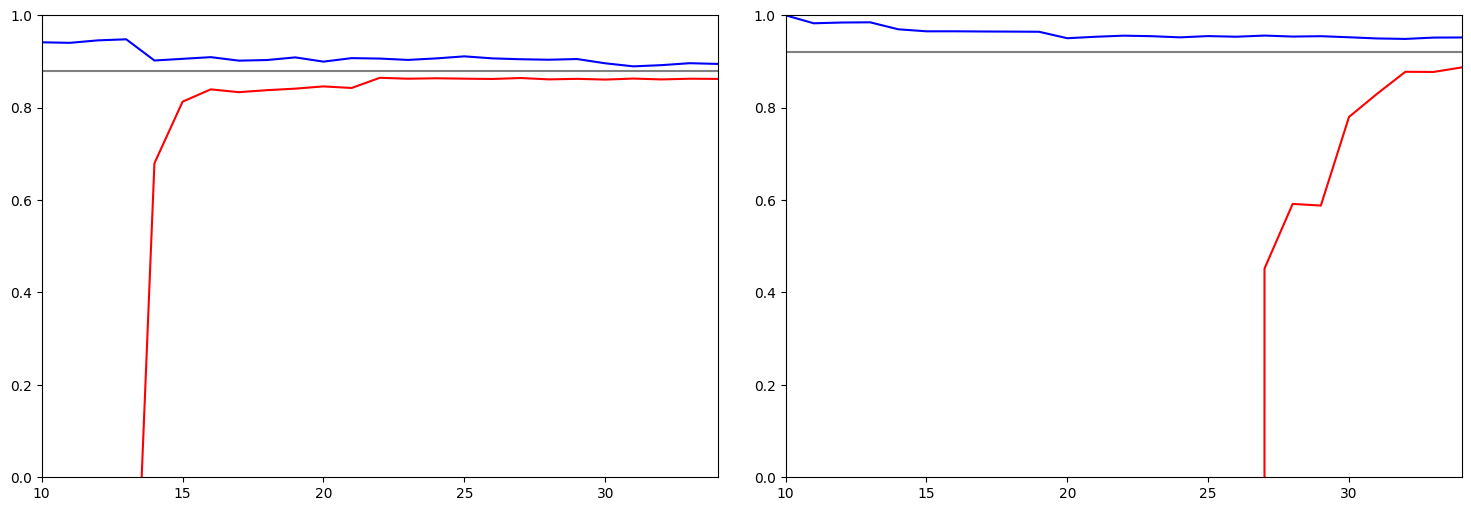

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=.0625, right=.95, wspace=.1)

for i, degree in enumerate([2, 9]):
  N, train_lc, val_lc = learning_curve(
    PolyRegression(degree), X, y, cv=7, train_sizes=np.linspace(.3, 1, 25)
  )
  ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='train')
  ax[i].plot(N, np.mean(val_lc, 1), color='red', label='val')
  ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray')
  ax[i].set_ylim(0, 1)
  ax[i].set_xlim(N[0], N[-1])

In [96]:
from sklearn.model_selection import GridSearchCV

In [99]:
grid = {'polynomialfeatures__degree': np.arange(21), 'linearregression__fit_intercept': [True, False]}
grid = GridSearchCV(PolyRegression(), grid, cv=7)

In [100]:
grid.fit(X,y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [101]:
grid.best_params_

{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 4}

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

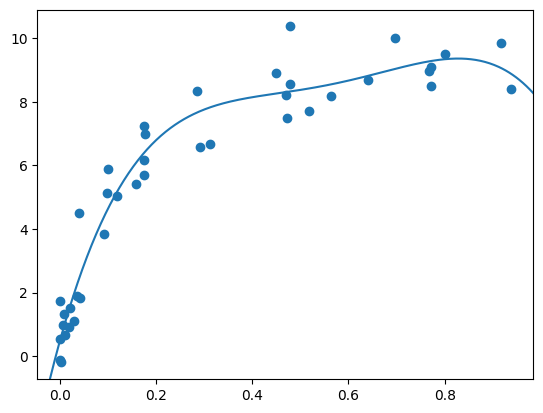

In [103]:
model = grid.best_estimator_
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

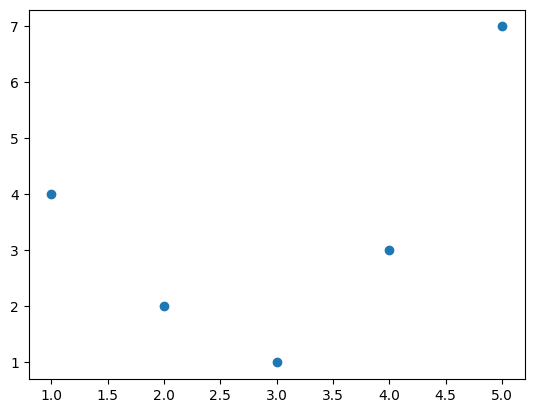

In [104]:
x = np.array([1,2,3,4,5])
y = np.array([4,2,1,3,7])
plt.scatter(x,y);

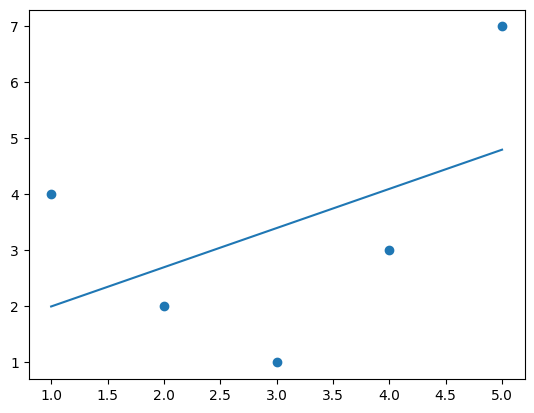

In [105]:
X = x[:, np.newaxis]
model = LinearRegression().fit(X,y)
yfit = model.predict(X)
plt.scatter(x,y)
plt.plot(x, yfit)

In [106]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
X2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

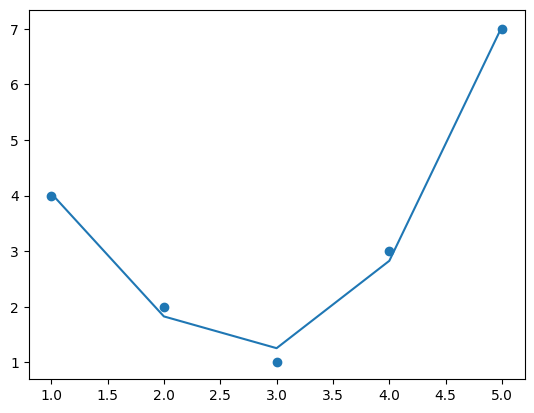

In [107]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x,y)
plt.plot(x, yfit)

In [111]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = .5 + np.dot(X, [1.5, -2, 1.])

model.fit(X, y)

LinearRegression()

In [112]:
model.intercept_

0.5000000000000201

In [113]:
model.coef_

array([ 1.5, -2. ,  1. ])

In [115]:
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [116]:
from sklearn.pipeline import make_pipeline

In [117]:
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

In [118]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + .1 * rng.randn(50)

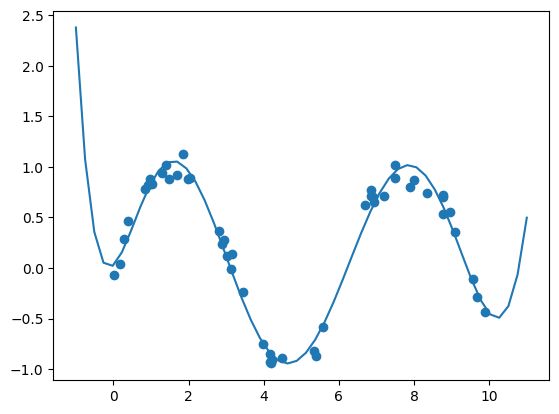

In [121]:
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [123]:
!cd data && curl -O "https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/BicycleWeather.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  229k  100  229k    0     0   371k      0 --:--:-- --:--:-- --:--:--  374k


In [124]:
counts = pd.read_csv("data/FremontBridge.csv", index_col='Date', parse_dates=True)

In [145]:
weather = pd.read_csv("data/BicycleWeather.csv", index_col='DATE', parse_dates=True)
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,122,56,47,180,190,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,89,28,61,200,220,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [146]:
counts = counts[counts.index < "2020-01-01"]
weather = weather[weather.index < "2020-01-01"]

In [147]:
daily = counts.resample('d').sum()
daily['Totals'] = daily.sum(axis=1)
daily.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Totals
Date,,,,
2012-10-03,7042.0,3520.0,3522.0,14084.0
2012-10-04,6950.0,3416.0,3534.0,13900.0
2012-10-05,6296.0,3116.0,3180.0,12592.0
2012-10-06,4012.0,2160.0,1852.0,8024.0
2012-10-07,4284.0,2382.0,1902.0,8568.0


In [148]:
daily = daily[['Totals']]

In [149]:
days = ['M', 'T', 'W', 'R', 'F', 'S,', 'U']
for i in range (7):
  daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [150]:
daily.head()

,Totals,M,T,W,R,F,"S,",U
Date,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [151]:
from pandas.tseries.holiday import USFederalHolidayCalendar


In [152]:
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2020')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

In [153]:
daily.tail(10)

,Totals,M,T,W,R,F,"S,",U,holiday
Date,,,,,,,,,
2019-12-22,2812.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-12-23,5960.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-24,3408.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-25,1652.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2019-12-26,4268.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2019-12-27,4552.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2019-12-28,3352.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2019-12-29,3692.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-12-30,7212.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
  days = (date - pd.datetime(2000, 12, 21)).days
  m = (1 - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))

  return 24 * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.
 

In [155]:
daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))

<AxesSubplot: xlabel='Date'>

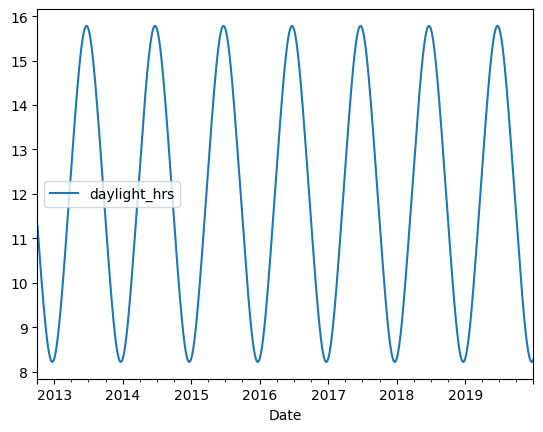

In [156]:
daily[['daylight_hrs']].plot()

In [157]:
weather['Temp (F)'] = .5 * (weather['TMIN'] + weather['TMAX'])
weather['Rainfall (in)'] = weather['PRCP']
weather['dry day'] = (weather['PRCP'] == 0).astype(int)
daily = daily.join(weather[['Rainfall (in)', 'Temp (F)', 'dry day']])

In [158]:
daily.head()

,Totals,M,T,W,R,F,"S,",U,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
Date,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,133.5,1.0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,136.0,1.0
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,153.0,1.0
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,158.5,1.0
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,158.5,1.0


In [159]:
daily['annual'] = (daily.index - daily.index[0]).days / 365
daily.head()

,Totals,M,T,W,R,F,"S,",U,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,133.5,1.0,0.000000
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,136.0,1.0,0.002740
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,153.0,1.0,0.005479
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,158.5,1.0,0.008219
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,158.5,1.0,0.010959


In [160]:
daily.dropna(axis=0, how='any', inplace=True)
X = daily.drop('Totals', axis=1)
y = daily['Totals']

In [161]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

In [162]:
daily.head()

,Totals,M,T,W,R,F,"S,",U,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day,annual,predicted
Date,,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,133.5,1.0,0.000000,13853.601102
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,136.0,1.0,0.002740,13447.791325
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,153.0,1.0,0.005479,12643.735292
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,158.5,1.0,0.008219,7632.376697
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,158.5,1.0,0.010959,7481.794465


<AxesSubplot: xlabel='Date'>

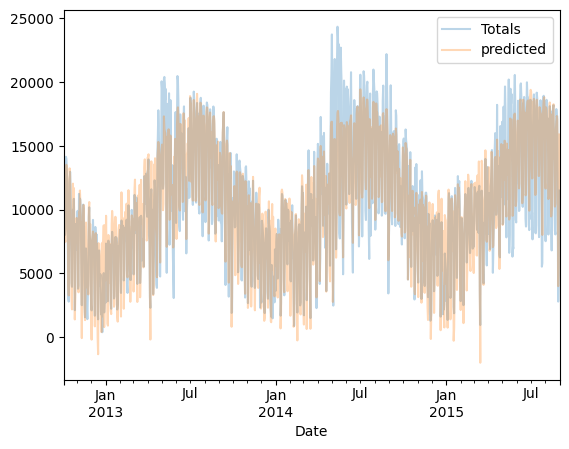

In [163]:
daily[['Totals', 'predicted']].plot(alpha=.3)

In [164]:
params = pd.Series(model.coef_, index=X.columns)

In [165]:
params

M                2019.531023
T                2440.935744
W                2370.694566
R                1929.432461
F                 711.921382
S,              -4413.206842
U               -4534.268983
holiday         -4749.605523
daylight_hrs      515.406045
Rainfall (in)     -10.469841
Temp (F)           26.065116
dry day          2190.794369
annual            107.770852
dtype: float64

In [166]:
from sklearn.utils import resample
np.random.seed(1)

In [167]:
err = np.std([model.fit(*resample(X, y)).coef_ for i in range(1000)], 0)

In [168]:
print(pd.DataFrame({'effect': params.round(0), 'uncertainty': err.round(0)}))

               effect  uncertainty
M              2020.0        345.0
T              2441.0        333.0
W              2371.0        331.0
R              1929.0        341.0
F               712.0        324.0
S,            -4413.0        318.0
U             -4534.0        332.0
holiday       -4750.0        653.0
daylight_hrs    515.0         36.0
Rainfall (in)   -10.0          1.0
Temp (F)         26.0          1.0
dry day        2191.0        133.0
annual          108.0         71.0


In [169]:
from sklearn.datasets import fetch_lfw_people

In [170]:
faces = fetch_lfw_people(min_faces_per_person=60)

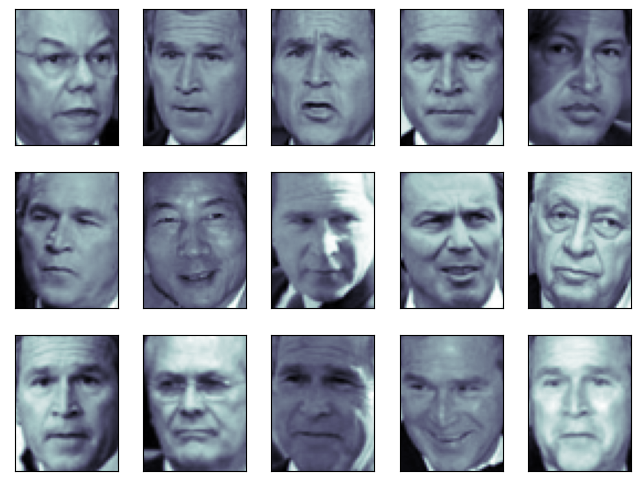

In [171]:
fig, ax = plt.subplots(3, 5, figsize=(8,6))
for i, a in enumerate(ax.flat):
  a.imshow(faces.images[i], cmap='bone')
  a.set(xticks=[], yticks=[])

xlabel=faces.target_names[faces.target[i]]

In [176]:
faces.images[0].shape

(62, 47)

In [177]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, svd_solver='randomized', random_state=42)

In [178]:
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)

In [180]:
pg = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [.0001, .0005, .001, .005]}
grid = GridSearchCV(model, pg)

In [181]:
%time 
grid.fit(X_train, y_train)

CPU times: user 37min 8s, sys: 9min 16s, total: 46min 24s
Wall time: 6min 45s


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            svd_solver='randomized',
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 10, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]})

In [182]:
grid.best_params_

{'svc__C': 5, 'svc__gamma': 0.001}

In [183]:
model = grid.best_estimator_
yfit = model.predict(X_test)

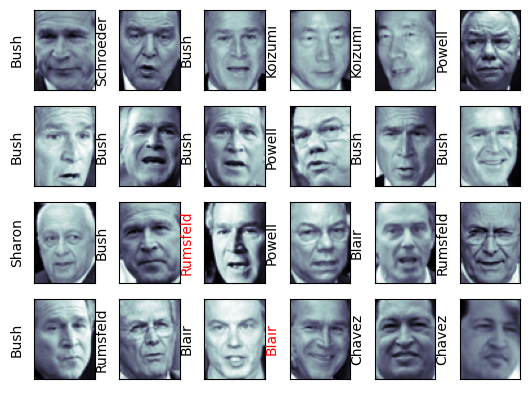

In [184]:
fig, ax = plt.subplots(4, 6)
for i, a in enumerate(ax.flat):
  a.imshow(X_test[i].reshape(62,47), cmap='bone')
  a.set(xticks=[], yticks=[])
  a.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == y_test[i] else 'red')

In [185]:
from sklearn.metrics import classification_report

In [186]:
print(classification_report(y_test, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



In [187]:
mat = confusion_matrix(y_test, yfit)

In [188]:
mat.shape

(8, 8)

In [189]:
mat

array([[ 13,   0,   2,   0,   0,   0,   0,   0],
       [  1,  60,   3,   2,   0,   0,   0,   2],
       [  1,   2,  26,   0,   0,   0,   0,   2],
       [  2,  10,   5, 101,   4,   1,   1,   2],
       [  0,   0,   1,   0,  19,   0,   1,   2],
       [  2,   0,   0,   1,   2,  14,   0,   1],
       [  0,   0,   0,   0,   0,   0,  12,   0],
       [  1,   0,   0,   0,   0,   0,   0,  41]])

Text(113.92222222222219, 0.5, 'predicted')

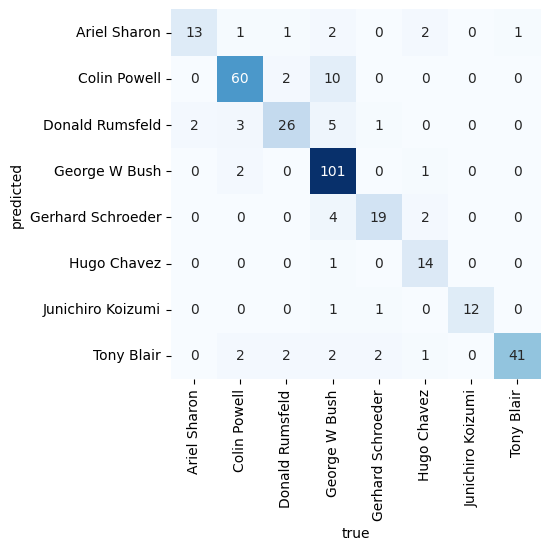

In [196]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
  xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('true')
plt.ylabel('predicted')

In [197]:
from sklearn.datasets import make_blobs

In [219]:
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1)

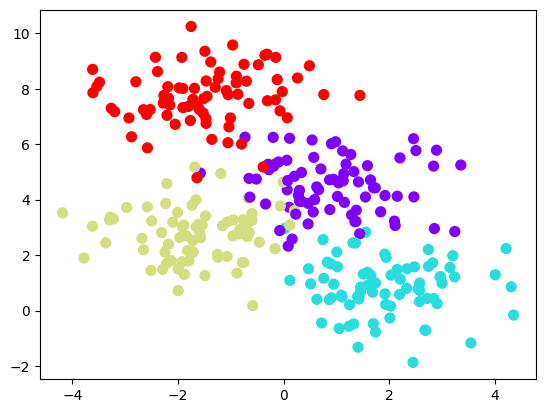

In [200]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [201]:
from sklearn.tree import DecisionTreeClassifier

In [202]:
tree = DecisionTreeClassifier().fit(X,y)

In [217]:
def viz(model, X, y, ax=None, cmap='rainbow'):
  ax = ax or plt.gca()
  ax.scatter(X[:, 0], X[:,1], c=y, s=30, cmap=cmap)
  ax.axis('tight')
  ax.axis('off')
  xlim= ax.get_xlim()
  ylim = ax.get_ylim()

  model.fit(X, y)

  xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

  n_classes = len(np.unique(y))
  countour = ax.contourf(xx, yy, Z, alpha=.3, levels=np.arange(n_classes + 1)-.5, cmap=cmap, zorder=1)

  ax.set(xlim=xlim, ylim=ylim)

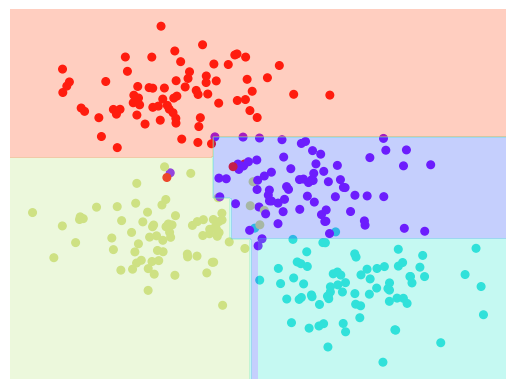

In [209]:
viz(DecisionTreeClassifier(max_depth=5), X, y)

In [212]:
x = [1, 2]
y = [3, 4,5]
xx, yy = np.meshgrid(x, y)

In [213]:
xx, yy

(array([[1, 2],
        [1, 2],
        [1, 2]]),
 array([[3, 3],
        [4, 4],
        [5, 5]]))

In [214]:
from sklearn.ensemble import RandomForestClassifier

In [215]:
model = RandomForestClassifier(n_estimators=100, random_state=0)

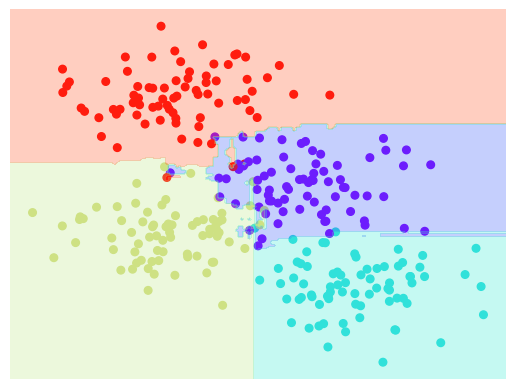

In [220]:
viz(model, X, y)

In [221]:
x = 10 * rng.rand(200)

def model(x, sigma=.3):
  fast = np.sin(5 * x)
  slow = np.sin(.5 * x)
  noise = sigma * rng.randn(len(x))

  return slow + fast + noise

<ErrorbarContainer object of 3 artists>

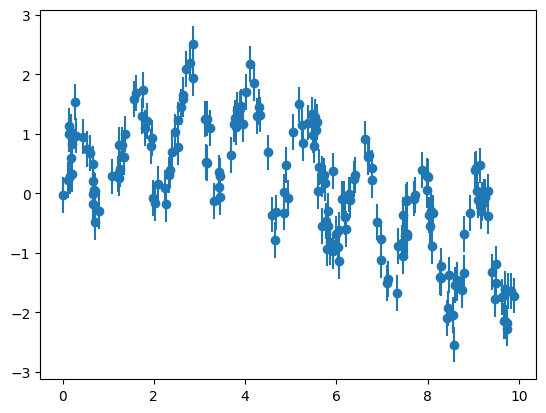

In [223]:
y = model(x)
plt.errorbar(x, y, .3, fmt='o')

In [224]:
from sklearn.ensemble import RandomForestRegressor

In [225]:
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

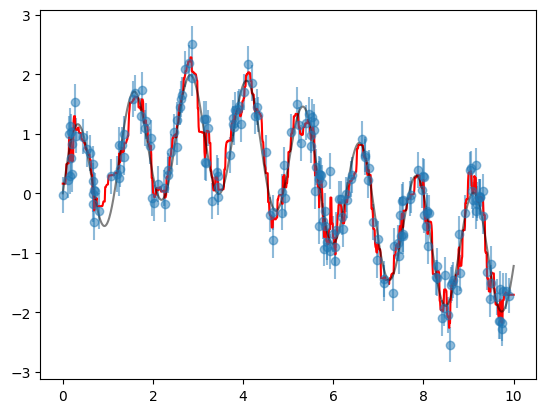

In [226]:
plt.errorbar(x, y, .3, fmt='o', alpha=.5)
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha=.5)


In [227]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

In [228]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
ypred = model.predict(X_test)

In [229]:
print(classification_report(ypred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.98      0.99        44
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [231]:
cm = confusion_matrix(y_test, ypred)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 42,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  1, 45,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 46]])

<AxesSubplot: >

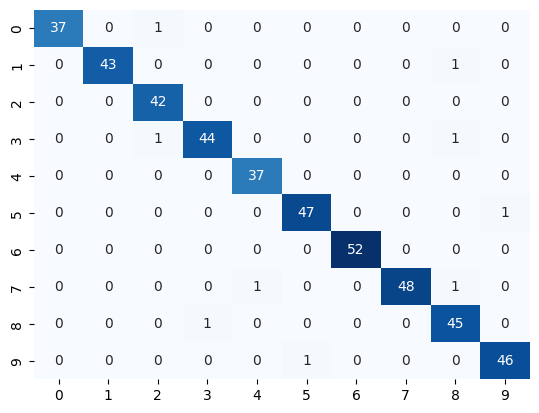

In [238]:
sns.heatmap(cm.T, cmap='Blues', annot=True, cbar=False)

In [247]:
import platts_sdk as platts

ModuleNotFoundError: No module named '_multibytecodec'

In [246]:
!pip3 install chardet